## Análisis exploratorio de Datos en Cromatorafía HPLC

##### Objetivo

1. Explorar bases de datos de espectros de HPLC (Cromatografía Líquida de Alta Eficiencia), cromatografía de gases (GC), u otras técnicas analíticas.

2. Identificar tendencias, distribuciones, valores atípicos (outliers), correlaciones y patrones en los datos.

3. Generar visualizaciones útiles para interpretar la información.

##### Preguntas Clave a responder con este análisis:

- ¿Cómo se distribuyen las concentraciones de los compuestos en diferentes muestras?

- ¿Existen correlaciones entre diferentes variables en los espectros?

- ¿Se pueden identificar patrones que diferencien distintos tipos de muestras?

- ¿Hay posibles anomalías o valores atípicos en los datos?

### Carga de Datos


In [1]:
import pandas as pd 

# Carga de datos
raw_data = pd.read_csv("datos_sinteticos_HPLC.csv")

# Mostrar primeras filas
print(raw_data.head())

   Tiempo_Retencion_min  Absorbancia_mAU
0              1.077310         0.004361
1              1.288183        -0.014928
2              1.355868         0.004619
3              1.481439        -0.099323
4              1.633182        -0.010875


### Revisión de datos faltantes o erróneos

In [2]:
# Verificar valores nulos
raw_data.isnull().sum()

# Descripción estadística
raw_data.describe()

,Tiempo_Retencion_min,Absorbancia_mAU
count,100.000000,100.000000
mean,7.582530,0.501809
std,4.164852,0.505029
min,1.077310,-0.099323
25%,3.704811,0.026345
50%,7.497994,0.422773
75%,11.222844,0.916621
max,14.816417,1.562970


### Visualización de la distribución de las variables

Gráficas de histogramas para poder ver como se distribuyen los tiempos de retención y la absorbancia

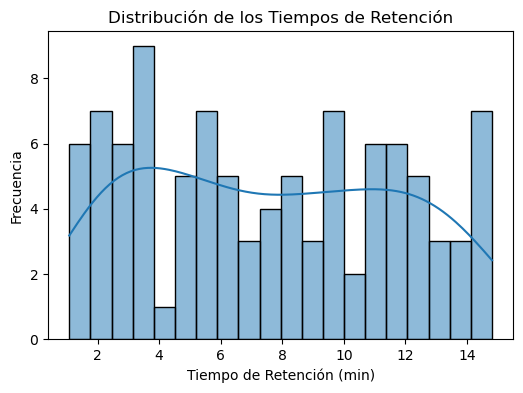

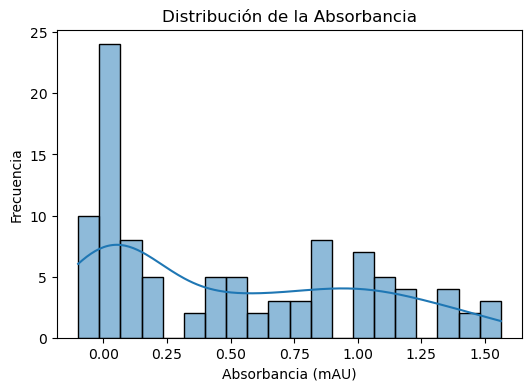

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Histograma de tiempos de retención
plt.figure(figsize = (6,4))
sns.histplot(raw_data["Tiempo_Retencion_min"], bins = 20, kde = True)
plt.xlabel("Tiempo de Retención (min)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Tiempos de Retención")
plt.show()

#Histograma de tiempos de retención
plt.figure(figsize = (6,4))
sns.histplot(raw_data["Absorbancia_mAU"], bins = 20, kde = True)
plt.xlabel("Absorbancia (mAU)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Absorbancia")
plt.show()

### Gráficos del espectro simulado

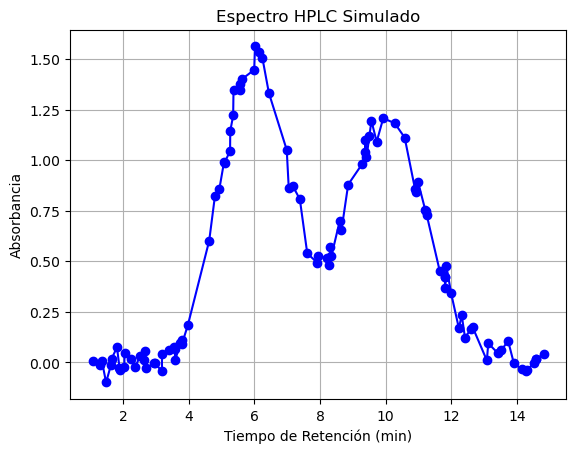

In [4]:
plt.Figure(figsize = (6,4))
plt.plot(raw_data["Tiempo_Retencion_min"], raw_data["Absorbancia_mAU"], marker = 'o', linestyle = '-', color = 'b')
plt.xlabel("Tiempo de Retención (min)")
plt.ylabel("Absorbancia")
plt.title("Espectro HPLC Simulado")
plt.grid()
plt.show()

### Detección de Outliers 

Usando diagramas de Caja (Bloxplots) para identificar valores fuera del rango típico

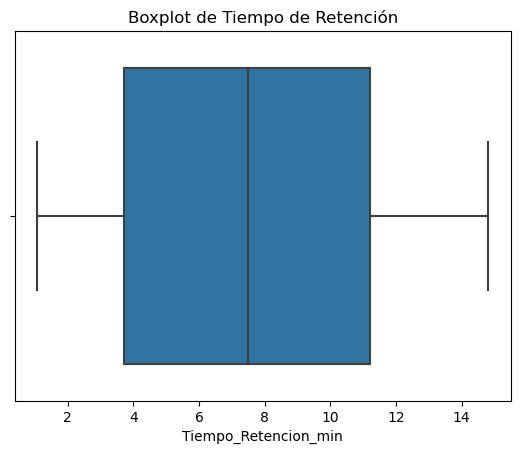

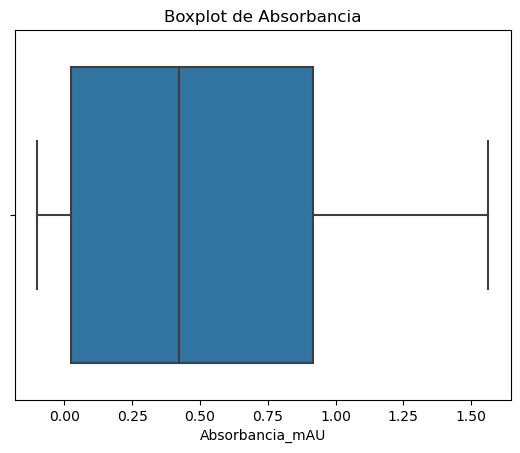

In [5]:
# Boxplot para tiempo de retención
plt.Figure(figsize = (5,3))
sns.boxplot(x = raw_data["Tiempo_Retencion_min"], whis = 3)
plt.title("Boxplot de Tiempo de Retención")
plt.show()

# Boxplot para Absorbancia
plt.Figure(figsize = (5,3))
sns.boxplot(x = raw_data["Absorbancia_mAU"], whis = 3)
plt.title("Boxplot de Absorbancia")
plt.show()

### Identificación numérica de Outliers con IQR

#### Límites inferior y superior del IQR

In [6]:
# Cálculo de límites IQR para verificar valores.
Q1 = raw_data["Tiempo_Retencion_min"].quantile(0.25)
Q3 = raw_data["Tiempo_Retencion_min"].quantile(0.75)

IQR = Q3 - Q1
limite_inferior = Q1 - 3 * IQR
limite_superior = Q3 + 3 * IQR
print(f"Límites para tiempo de Retención:{limite_inferior:.3f} a {limite_superior:.3f}")

Q1_a = raw_data["Absorbancia_mAU"].quantile(0.25)
Q3_a = raw_data["Absorbancia_mAU"].quantile(0.75)
IQR_a = Q3_a - Q1_a
limite_inferior_a = Q1_a - 3 * IQR_a
limite_superior_a = Q3_a + 3 * IQR_a
print(f"Límites para Absorbancia: {limite_inferior_a:.3f} a {limite_superior_a:.3f}")

Límites para tiempo de Retención:-18.849 a 33.777
Límites para Absorbancia: -2.644 a 3.587


#### Comparación Boxplot y Límites IQR

In [7]:
Q1 = raw_data["Tiempo_Retencion_min"].quantile(0.25)
Q3 = raw_data["Tiempo_Retencion_min"].quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 3 * IQR
limite_sup = Q3 + 3 * IQR

print(f"Bigotes en el boxplot: [{raw_data['Tiempo_Retencion_min'].min()}, {raw_data['Tiempo_Retencion_min'].max()}]")
print(f"Límites del IQR: [{limite_inf}, {limite_sup}]")

Bigotes en el boxplot: [1.0773096397304336, 14.816417112407242]
Límites del IQR: [-18.84928840770729, 33.77694272633725]


#### Resaltar los Outliers manualmente

Si el boxplot sigue sin reflejar los outliers correctamente, podemos graficar los puntos de outliers aparte, resaltándolos sobre el boxplot.

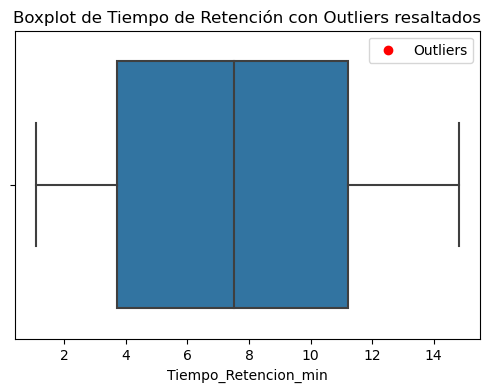

In [8]:
import numpy as np

# Filtramos los outliers detectados con IQR
outliers = raw_data[(raw_data["Tiempo_Retencion_min"] < -18.849) | (raw_data["Tiempo_Retencion_min"] > 33.777)]

plt.figure(figsize=(6,4))
sns.boxplot(x=raw_data["Tiempo_Retencion_min"], whis=1.5)  # Boxplot normal
plt.scatter(outliers["Tiempo_Retencion_min"], np.zeros_like(outliers["Tiempo_Retencion_min"]), color='red', label="Outliers")  # Agregamos puntos en rojo

plt.title("Boxplot de Tiempo de Retención con Outliers resaltados")
plt.legend()
plt.show()

#### ¿Realmente hay Outliers en los datos?

In [9]:
outliers = raw_data[(raw_data["Tiempo_Retencion_min"] < -18.849) | (raw_data["Tiempo_Retencion_min"] > 33.777)]
print(f"Cantidad de outliers: {len(outliers)}")

Cantidad de outliers: 0


### Usando Z - score para analizar Outliers

In [10]:
from scipy.stats import zscore

# Calcular Z-score para cada variable
z_scores = raw_data.apply(zscore)

# Definir el umbral para considerar un outlier (generalmente |Z| > 3)
threshold = 3

# Identificar valores que exceden el umbral
outliers_retencion = np.where(np.abs(z_scores["Tiempo_Retencion_min"]) > threshold)[0]
outliers_absorbancia = np.where(np.abs(z_scores["Absorbancia_mAU"]) > threshold)[0]

# Contar los outliers detectados
(len(outliers_retencion), len(outliers_absorbancia))

print(f"Cantidad de outliers en Tiempo de Retención: {len(outliers_retencion)} y en Absorbancia: {len(outliers_absorbancia)}")

Cantidad de outliers en Tiempo de Retención: 0 y en Absorbancia: 0


#### ¿Se deben eliminar o dejar los Outliers?

Miremos los sigueintes graficos de Dispersión, histograma y serie de tiempo para tomar nuestra desición:

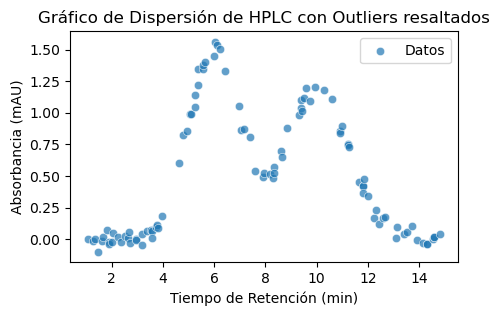

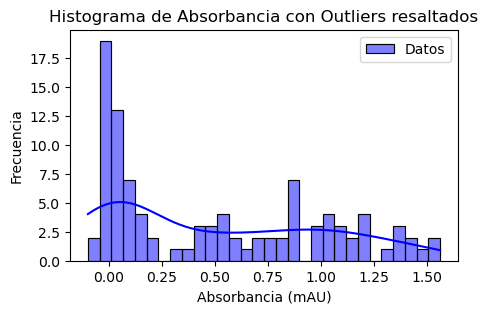

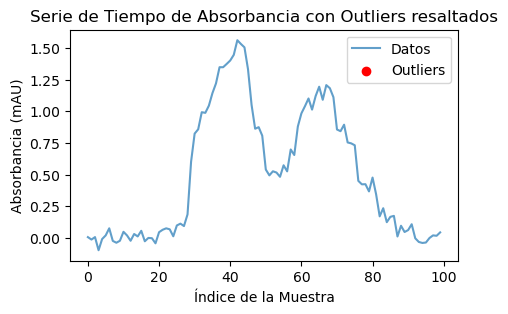

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos
raw_data = pd.read_csv("datos_sinteticos_HPLC.csv")

# Definir umbral para outliers usando Z-score (ajusta el umbral si es necesario)
from scipy.stats import zscore
raw_data["Z_Score"] = zscore(raw_data["Absorbancia_mAU"])
outliers = raw_data[abs(raw_data["Z_Score"]) > 3]  # Outliers con Z-score mayor a 3

# 1️⃣ Scatter plot con outliers resaltados
plt.figure(figsize=(5,3))
sns.scatterplot(data=raw_data, x="Tiempo_Retencion_min", y="Absorbancia_mAU", label="Datos", alpha=0.7)
sns.scatterplot(data=outliers, x="Tiempo_Retencion_min", y="Absorbancia_mAU", color="red", label="Outliers")
plt.xlabel("Tiempo de Retención (min)")
plt.ylabel("Absorbancia (mAU)")
plt.title("Gráfico de Dispersión de HPLC con Outliers resaltados")
plt.legend()
plt.show()

# 2️⃣ Histograma de Absorbancia con outliers resaltados
plt.figure(figsize=(5,3))
sns.histplot(raw_data["Absorbancia_mAU"], bins=30, kde=True, color="blue", label="Datos")
sns.histplot(outliers["Absorbancia_mAU"], bins=30, kde=True, color="red", label="Outliers")
plt.xlabel("Absorbancia (mAU)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Absorbancia con Outliers resaltados")
plt.legend()
plt.show()

# 3️⃣ Serie de tiempo (si los datos están en orden cronológico)
plt.figure(figsize=(5,3))
plt.plot(raw_data.index, raw_data["Absorbancia_mAU"], label="Datos", alpha=0.7)
plt.scatter(outliers.index, outliers["Absorbancia_mAU"], color="red", label="Outliers")
plt.xlabel("Índice de la Muestra")
plt.ylabel("Absorbancia (mAU)")
plt.title("Serie de Tiempo de Absorbancia con Outliers resaltados")
plt.legend()
plt.show()

✅ Si los outliers siguen un patrón, podrían representar compuestos reales y no deberían eliminarse.

✅ Si los outliers parecen aleatorios y aislados, podrían ser errores de medición y deberían eliminarse.

## Identificación y cuantificación de picor cromatográficos

#### 1. Suavizado de la señal

Reducir el ruido en los datos aplicando filtro de Savitzky-Golay:

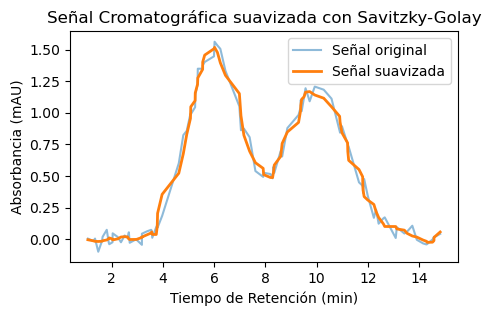

In [12]:
from scipy.signal import savgol_filter

# Asegurar nombres de las columnas
col_tiempo = "Tiempo_Retencion_min"
col_absorbancia = "Absorbancia_mAU"

# Filtro de Savitzky-Golay
ventana = 11 # Debe ser un número impar
orden_polinomio = 3 # Ajuste de polinomio para suavizar
raw_data["Absorbancia_suavizada"] = savgol_filter(raw_data[col_absorbancia], ventana, orden_polinomio)

# Grafica de la señal original y suavizada
plt.figure(figsize = (5, 3))
plt.plot(raw_data[col_tiempo], raw_data[col_absorbancia], label = "Señal original", alpha = 0.5)
plt.plot(raw_data[col_tiempo], raw_data["Absorbancia_suavizada"], label = "Señal suavizada", linewidth = 2)
plt.xlabel("Tiempo de Retención (min)")
plt.ylabel("Absorbancia (mAU)")
plt.title("Señal Cromatográfica suavizada con Savitzky-Golay")
plt.legend()
plt.show()

#### Identificación y cuantificación de picos cromatográficos
Usando la función find_peaks de scipy.signal ajustando lo parámetros: height, distance.


Para cada pico detectado se va a calcular:

            1. Altura de pico
            
            2. Área bajo la curva

            3. Ancho de pico a media altura (FWHM)


Resultados de cuantificación cromatográficos:
    Tiempo de Retención (min)  Altura (mAU)      Área
42                   6.018520      1.518231  2.038328
66                   9.726174      1.168506  1.682311


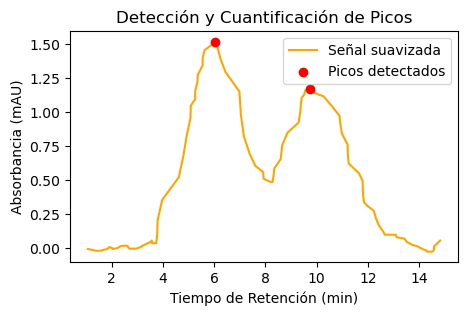

In [13]:
from scipy.integrate import  simps
from scipy.ndimage import  gaussian_filter1d
from scipy.signal import find_peaks, savgol_filter

# Variables de tiempo de retención y absorbancia
tiempo = raw_data["Tiempo_Retencion_min"]
Absorbancia_mAU = raw_data["Absorbancia_mAU"]
Absorbancia_suavizada = raw_data["Absorbancia_suavizada"]

# Detección de picos 
peaks, _ = find_peaks(Absorbancia_suavizada, height = 0.5, distance = 10)

# Calcular área bajo la curva de cada pico
areas = []
for peak in peaks:
    left_base = max(0, peak - 5)
    right_base = min(len(tiempo) - 1, peak + 5)
    area = simps(Absorbancia_suavizada[left_base:right_base], tiempo[left_base:right_base])
    areas.append(area)
    
# Crear Dataframe con la cuantificación de los picos
df_picos = pd.DataFrame({
    "Tiempo de Retención (min)": tiempo.iloc[peaks].values,
    "Altura (mAU)": Absorbancia_suavizada[peaks],
    "Área": areas
})

# Mostrar tabla de picos detectados
print("\nResultados de cuantificación cromatográficos:")
print(df_picos)

# Guardar tabla en un archivo CSV
df_picos.to_csv("resultados_picos.csv", index = False)

# Graficar señal y picos detectados
plt.figure(figsize=(5,3))
plt.plot(tiempo, Absorbancia_suavizada, label="Señal suavizada", color="orange")
plt.scatter(tiempo.iloc[peaks], Absorbancia_suavizada[peaks], color="red", label="Picos detectados", zorder=3)
plt.xlabel("Tiempo de Retención (min)")
plt.ylabel("Absorbancia (mAU)")
plt.title("Detección y Cuantificación de Picos")
plt.legend()
plt.show()

#### Resolución de picos 

La resolución entre dos picos cromatográficos se calcula con la siguiente ecuación:


$$R_s = \frac{2 (t_{R2} - t_{R1})}{w_1 + w_2}$$


Donde:

$$R_s: \text{es la resolución entre picos.}$$ 
$$t_{R1}, t_{R2}: \text{son los tiempos de retención de los picos.}$$
$$w_1, w_2: \text{son los anchos de los picos en su anchura a la mitad de la altura (FWHM).}$$

   Pico 1 (min)  Pico 2 (min)  Resolución
0          6.02          9.93    2.369697


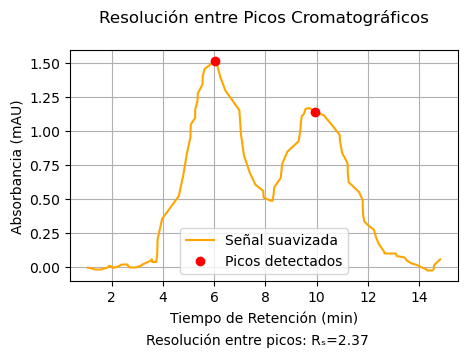

In [14]:

# Definición de la ecuación de resolución
def resolucion_picos(rt1, rt2, w1, w2):
    return (2 * (rt2 - rt1)) / (w1 + w2)

# Valores de tiempo de retención de los picos detectados
picos_rt = [6.02, 9.93]  
anchos_picos = [1.5, 1.8]  

# Cálculo de resolución
resoluciones = []
for i in range(len(picos_rt) - 1):
    R_s = resolucion_picos(picos_rt[i], picos_rt[i+1], anchos_picos[i], anchos_picos[i+1])
    resoluciones.append((picos_rt[i], picos_rt[i+1], R_s))

# Crear tabla de resultados
df_resolucion = pd.DataFrame(resoluciones, columns=["Pico 1 (min)", "Pico 2 (min)", "Resolución"])
print(df_resolucion)  # Muestra la tabla en consola

# Obtener alturas reales en la señal suavizada
alturas_picos = np.interp(picos_rt, tiempo, Absorbancia_suavizada)

# Gráfico mejorado
plt.figure(figsize=(5,3))
plt.plot(tiempo, Absorbancia_suavizada, label="Señal suavizada", color="orange")
plt.plot(picos_rt, alturas_picos, 'ro', label="Picos detectados")

# Ubicar Rs como anotación debajo del gráfico
plt.figtext(0.5, -0.1, f"Resolución entre picos: Rₛ={resoluciones[0][2]:.2f}", 
            ha="center", fontsize=10, color="black")

plt.xlabel("Tiempo de Retención (min)")
plt.ylabel("Absorbancia (mAU)")
plt.title("Resolución entre Picos Cromatográficos", pad=20)
plt.legend()
plt.grid()
plt.show()

$$
Si \ R_s > 1.5 \rightarrow \text{Los picos están bien separados y pueden analizarse individualmente.} \\

Si \ R_s < 1.5 \rightarrow \text{Hay solapamiento de picos, lo que podría afectar la cuantificación.} \\

Si \ R_s \approx 0 \rightarrow \text{Los picos están totalmente superpuestos y deben optimizarse.}
$$


## Automatización del proceso

El proceso de automatización rige los siguientes pasos :

**1.** Cargar el archivo csv especificado o deseado.

**2.** Aplicar el análisis de detección y cuantificación de picos.

**3.** Calcular la resolución de picos.

**4.** Guardar los resultados en un archivo de excel (hojas separadas para cada análisis).


In [27]:
# Función para detectar picos y calcular la resolución
def procesar_hplc(archivo_entrada, archivo_salida):
    
    # Extensión archivo salida
    if not archivo_salida.endswith(".xlsx"):
        archivo_salida += ".xlsx"
        
    # Cargar datos
    data = pd.read_csv(archivo_entrada)
    tiempo = data['Tiempo_Retencion_min']
    absorbancia = data['Absorbancia_mAU']
    
    # Suavizado de la señal
    Absorbancia_suavizada = absorbancia.rolling(window = 5, center = True).mean()

    # Detección de picos
    picos, _ = find_peaks(Absorbancia_suavizada, height = 0.5)
    tiempos_picos = tiempo[picos].values
    alturas_picos = Absorbancia_suavizada[picos].values
    
    # Cálculo de áreas bajo los picos
    areas = []
    for pico in picos:
        left_base = max(0, pico - 5)
        right_base = min(len(tiempo) - 1, pico + 5)
        areas_picos = simps(Absorbancia_suavizada[left_base:right_base], tiempo[left_base:right_base])
        areas.append(areas_picos)
    
    # Cálculo de la resolución
    resoluciones = []
    for i in range(len(tiempos_picos) - 1):
        rt1, rt2 = tiempos_picos[i], tiempos_picos[i+1]
        w1, w2 = 1.5, 1.8  # Valores de ejemplo/referencia de ancho de pico
        Rs = (2 * (rt2 - rt1)) / (w1 + w2) 
        resoluciones.append([rt1, rt2, Rs])
        
    # Crear DataFrames
    
    df_picos = pd.DataFrame({
        "Tiempo de Retención (min)": tiempos_picos,
        "Altura (mAU)": alturas_picos,
        "Área (mAU·min)": areas
    })
    df_resolucion = pd.DataFrame(resoluciones, columns = ["Pico 1 (min)", "Pico 2 (min)", "Resolución"])
    
    # Exportar en Excel
    with pd.ExcelWriter(archivo_salida) as writer:
        df_picos.to_excel(writer, sheet_name = "Picos Detectados", index = False)
        df_resolucion.to_excel(writer, sheet_name = "Resolución", index = False)
        
    print(f"Anlálisis completado. Resultados guardados en {archivo_salida}")
    
# Modo de uso (Ejemplo)
procesar_hplc("datos_sinteticos_HPLC.csv","resultados_dsinteticos_HPLC")

Anlálisis completado. Resultados guardados en resultados_dsinteticos_HPLC.xlsx


In [29]:
!jupyter nbconvert --to script 1_Analisis_cromatografía.ipynb

[NbConvertApp] Converting notebook 1_Analisis_cromatografía.ipynb to script
[NbConvertApp] Writing 14833 bytes to 1_Analisis_cromatografía.py
